# 08 - Analysis - Sonden
### Author: Daniel Herrera-Russert
#### March 28, 2025

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
# Load the GeoJSON file into a GeoPandas
geojson_path = "../data/raw/zh_geothermal_probes.geojson"
zh_geothermal_probes_gdf = gpd.read_file(geojson_path)

In [3]:
# Load the GeoJSON file into a GeoPandas
geojson_path = "../data/raw/zh_probes.geojson"
zh_probes_gdf = gpd.read_file(geojson_path)

In [6]:
# Load and ensure Zürich boundary is in LV95
boundary_gdf = gpd.read_file("../data/raw/zh_boundary.geojson").to_crs("EPSG:2056")

# Merge into single polygon
boundary_polygon = boundary_gdf.geometry.union_all()  # Returns a single shapely object

In [4]:
zh_probes_gdf

,gml_id,GBS_id,geometry
0,sonden.20610,h 00-10758,POINT (2706188.857 1252632.787)
1,sonden.20611,n 00-10422,POINT (2675428.857 1243459.858)
2,sonden.20612,g 01-10015,POINT (2688149.903 1250116.827)
3,sonden.20613,g 01-10015,POINT (2688191.903 1250125.828)
4,sonden.20614,l 00-10641,POINT (2682169.148 1269837.929)
...,...,...,...
968,sonden.21605,b 00-12883,POINT (2682429.874 1243210.837)
969,sonden.21606,b 00-12884,POINT (2682437.874 1243193.837)
970,sonden.21607,b 00-12898,POINT (2679169.94 1251653.869)
971,sonden.21608,c 00-12618,POINT (2676688.815 1236588.853)


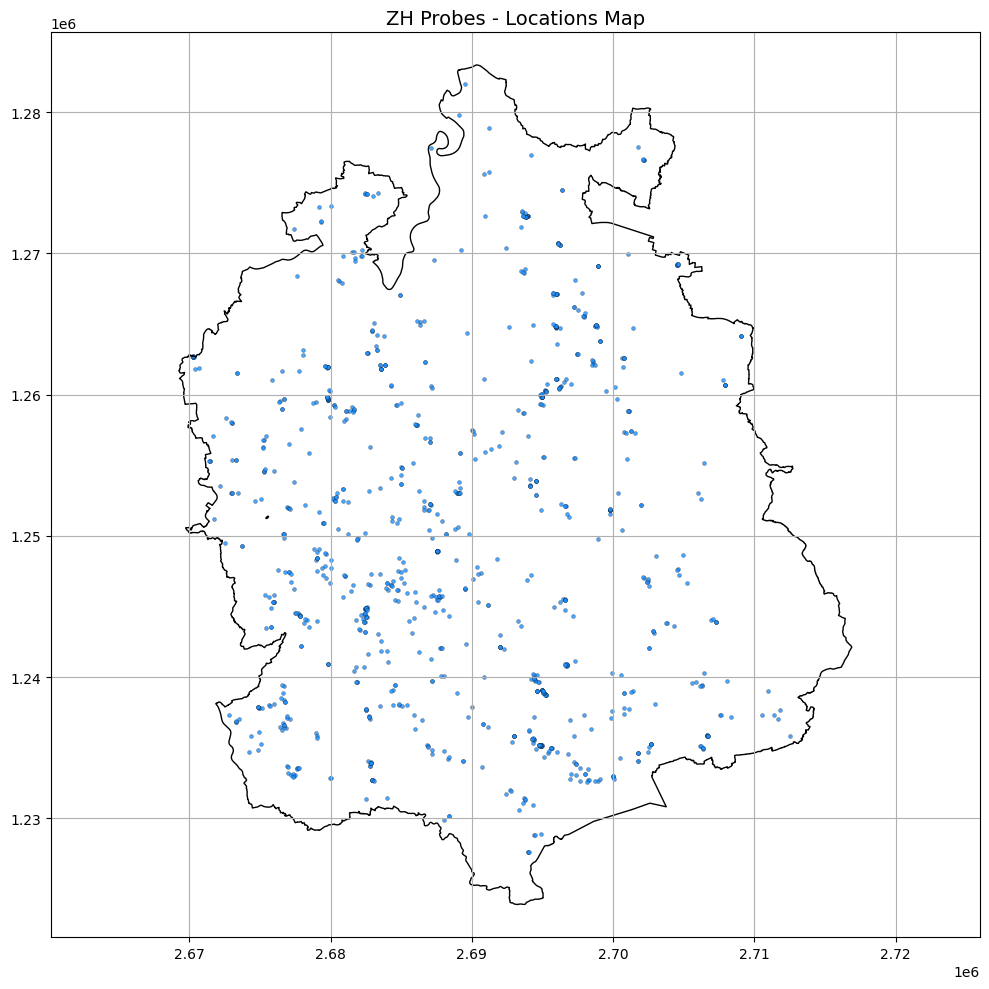

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot probe locations
zh_probes_gdf.plot(
    ax=ax,
    color="dodgerblue",
    markersize=8,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.2,
)

# Overlay canton boundary (if applicable and CRS matches)
boundary_gdf.to_crs(zh_probes_gdf.crs).plot(
    ax=ax, facecolor="none", edgecolor="black", linewidth=1
)

ax.grid(True)
plt.title("ZH Probes - Locations Map", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.savefig("plots/07_05_zh_probes_map.svg", format="svg", bbox_inches="tight")
plt.savefig("plots/07_05_zh_probes_map.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


In [11]:
from owslib.wfs import WebFeatureService

wfs = WebFeatureService("https://maps.zh.ch/wfs/AwelGSWaermewwwZHWFS", version="2.0.0")

list(wfs.contents['ms:sonden'].metadataUrls)

wfs.get_schema('ms:sonden')

{'properties': {'GBS_id': 'string'},
 'required': ['msGeometry', 'GBS_id'],
 'geometry': 'GeometryCollection',
 'geometry_column': 'msGeometry'}

In [12]:
response = wfs.getfeature(
    typename='ms:sonden',
    outputFormat='text/xml; subtype=gml/3.2.1'
)
with open("sonden.gml", "wb") as f:
    f.write(response.read())

import geopandas as gpd
gdf = gpd.read_file("sonden.gml")

In [13]:
gdf

,gml_id,GBS_id,geometry
0,sonden.20610,h 00-10758,POINT (2706188.857 1252632.787)
1,sonden.20611,n 00-10422,POINT (2675428.857 1243459.858)
2,sonden.20612,g 01-10015,POINT (2688149.903 1250116.827)
3,sonden.20613,g 01-10015,POINT (2688191.903 1250125.828)
4,sonden.20614,l 00-10641,POINT (2682169.148 1269837.929)
...,...,...,...
968,sonden.21605,b 00-12883,POINT (2682429.874 1243210.837)
969,sonden.21606,b 00-12884,POINT (2682437.874 1243193.837)
970,sonden.21607,b 00-12898,POINT (2679169.94 1251653.869)
971,sonden.21608,c 00-12618,POINT (2676688.815 1236588.853)
